In [22]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
import os
from mpl_toolkits.mplot3d import Axes3D

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
initial_data = yf.download("AMZN ^VIX", start="2020-10-16", end="2021-10-15")

[*********************100%***********************]  2 of 2 completed


In [25]:
initial_data.head()

Adj Close                   Close                    High  \
                   AMZN       ^VIX         AMZN       ^VIX         AMZN   
Date                                                                      
2020-10-15  3338.649902  26.969999  3338.649902  26.969999  3355.879883   
2020-10-16  3272.709961  27.410000  3272.709961  27.410000  3399.659912   
2020-10-19  3207.209961  29.180000  3207.209961  29.180000  3329.000000   
2020-10-20  3217.010010  29.350000  3217.010010  29.350000  3266.000000   
2020-10-21  3184.939941  28.650000  3184.939941  28.650000  3233.879883   

                              Low                    Open              Volume  \
                 ^VIX        AMZN       ^VIX         AMZN       ^VIX     AMZN   
Date                                                                            
2020-10-15  29.059999  3280.00000  26.820000  3292.010010  27.100000  5223400   
2020-10-16  27.459999  3160.00000  26.190001  3363.229980  27.160000  6474400   
2020-10-19  29.690001  3192.73999  27.040001  3299.610107  27.360001  5223600   
2020-10-20  29.600000  3192.01001  28.290001  3222.280029  28.809999  4509700   
2020-10-21  30.549999  3160.00000  28.370001  3212.500000  29.120001  4592700   

                 
           ^VIX  
Date             
2020-10-15    0  
2020-10-16    0  
2020-10-19    0  
2020-10-20    0  
2020-10-21    0

In [26]:
initial_data['Adj Close'].head()

,AMZN,^VIX
Date,,
2020-10-15,3338.649902,26.969999
2020-10-16,3272.709961,27.410000
2020-10-19,3207.209961,29.180000
2020-10-20,3217.010010,29.350000
2020-10-21,3184.939941,28.650000


In [27]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-10-15 to 2021-10-14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    252 non-null    float64
 1   ^VIX    252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [28]:
data.head()

,AMZN,^VIX
Date,,
2020-10-15,3338.649902,26.969999
2020-10-16,3272.709961,27.410000
2020-10-19,3207.209961,29.180000
2020-10-20,3217.010010,29.350000
2020-10-21,3184.939941,28.650000


In [29]:
data.tail()

,AMZN,^VIX
Date,,
2021-10-08,3288.620117,18.770000
2021-10-11,3246.300049,20.000000
2021-10-12,3247.330078,19.850000
2021-10-13,3284.280029,18.639999
2021-10-14,3299.860107,16.860001


array([<AxesSubplot:xlabel='Date'>], dtype=object)

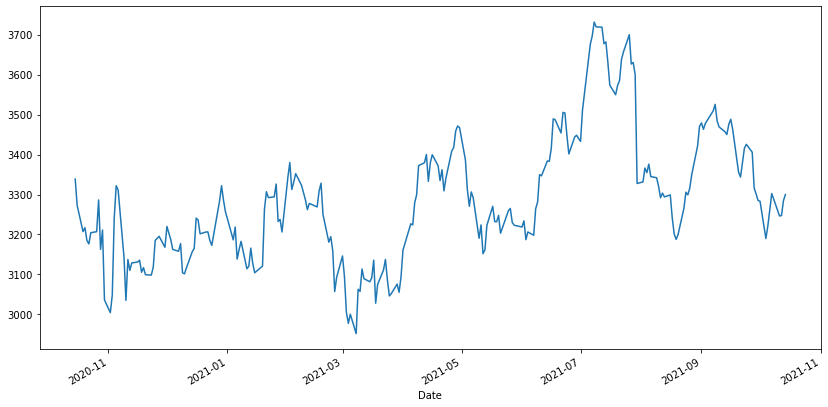

In [32]:
data["AMZN"].plot(figsize=(14, 7), subplots=True)

# Statistics

In [33]:
data.describe().round(2)

,AMZN,^VIX
count,252.00,252.00
mean,3285.33,21.00
std,158.23,4.49
min,2951.95,15.07
25%,3177.07,17.63
50%,3270.46,20.62
75%,3373.15,22.97
max,3731.41,40.28


In [34]:
data.diff().describe().round(2)

,AMZN,^VIX
count,251.00,251.00
mean,-0.15,-0.04
std,52.40,2.02
min,-272.33,-7.00
25%,-27.36,-0.99
50%,3.89,-0.26
75%,31.86,0.80
max,192.75,14.19


In [37]:
sym = 'AMZN'
AMZN_data = pd.DataFrame(data[sym]).dropna()
AMZN_data.tail()

,AMZN
Date,
2021-10-08,3288.620117
2021-10-11,3246.300049
2021-10-12,3247.330078
2021-10-13,3284.280029
2021-10-14,3299.860107


In [38]:
window = 10
AMZN_data['min'] = data[sym].rolling(window=window).min()
AMZN_data['mean'] = data[sym].rolling(window=window).mean()
AMZN_data['std'] = data[sym].rolling(window=window).std()
AMZN_data['median'] = data[sym].rolling(window=window).median()
AMZN_data['max'] = data[sym].rolling(window=window).max()
AMZN_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
AMZN_data.dropna().head()

,AMZN,min,mean,std,median,max,ewma
Date,,,,,,,
2020-10-28,3162.780029,3162.780029,3225.746973,55.691304,3207.125000,3338.649902,3188.577966
2020-10-29,3211.010010,3162.780029,3212.982983,39.093341,3207.125000,3286.330078,3205.402003
2020-10-30,3036.149902,3036.149902,3189.326978,63.123481,3205.719971,3286.330078,3078.462920
2020-11-02,3004.479980,3004.479980,3169.053979,85.374880,3194.669922,3286.330078,3022.975715
2020-11-03,3048.409912,3004.479980,3152.193970,91.294665,3180.669922,3286.330078,3042.051363


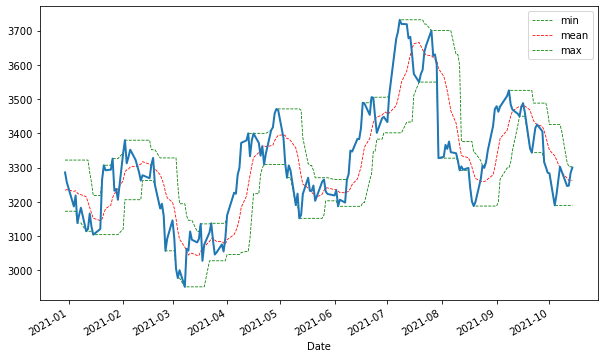

In [39]:
ax = AMZN_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

In [41]:
AMZN_data['SMA1'] = data[sym].rolling(window=20).mean()
AMZN_data['SMA2'] = data[sym].rolling(window=70).mean()
AMZN_data[[sym, 'SMA1', 'SMA2']].tail()

,AMZN,SMA1,SMA2
Date,,,
2021-10-08,3288.620117,3355.483508,3433.403714
2021-10-11,3246.300049,3344.940015,3430.737001
2021-10-12,3247.330078,3334.806519,3426.970574
2021-10-13,3284.280029,3325.231018,3421.378289
2021-10-14,3299.860107,3315.812024,3415.710861


<AxesSubplot:xlabel='Date'>

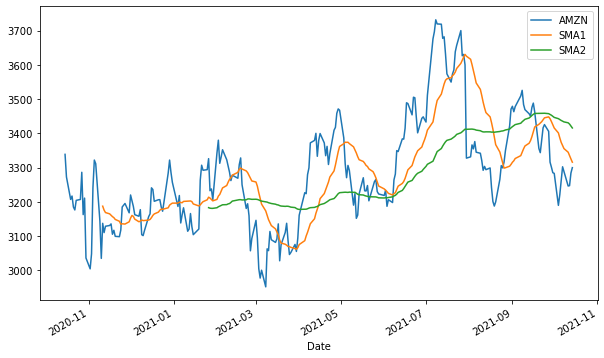

In [42]:
AMZN_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

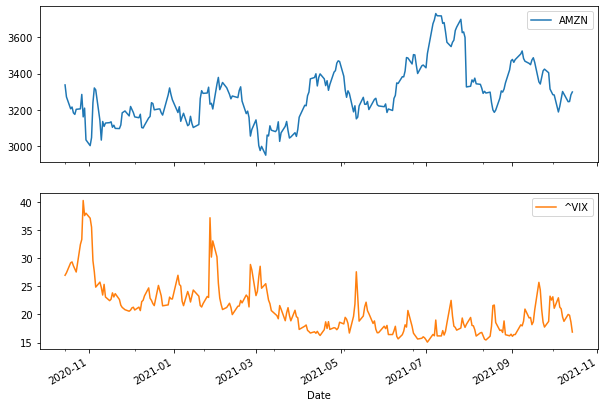

In [45]:
data.plot(figsize=(10, 7), subplots=True)

# Correlation Analysis

In [46]:
Corr_data = data[['AMZN', '^VIX']].dropna()
Corr_data.tail()

,AMZN,^VIX
Date,,
2021-10-08,3288.620117,18.770000
2021-10-11,3246.300049,20.000000
2021-10-12,3247.330078,19.850000
2021-10-13,3284.280029,18.639999
2021-10-14,3299.860107,16.860001


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

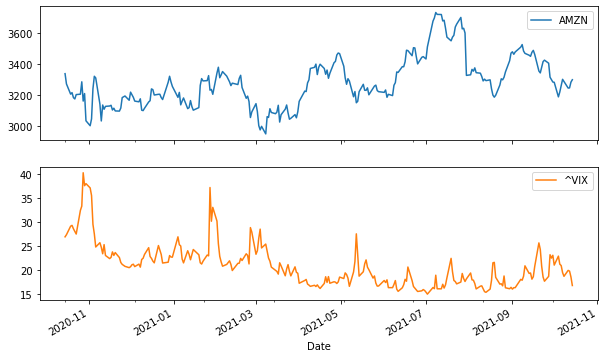

In [47]:
Corr_data.plot(subplots=True, figsize=(10, 6))

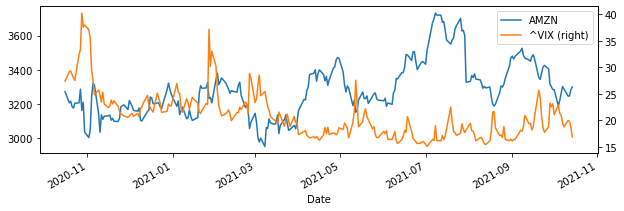

In [48]:
Corr_data.loc['2020-10-16':'2021-10-15'].plot(secondary_y='^VIX', figsize=(10, 3));

In [51]:
bvol = data["AMZN"]
log_return = np.log(bvol / bvol.shift(1))

In [52]:
vol = np.sqrt(252) * log_return.std()
print('The annual volatility:', round(vol*100,3), '%')

The annual volatility: 25.465 %


In [53]:
vix = data['^VIX'][-1]
print('The market volatility:', round(vix,2), '%')

The market volatility: 16.86 %


# PRICING METHODOLOGY

# BINOMIAL TREE

In [64]:
S0 = 3299.86           
K = 3250         
T = 1.0               
r = 0.01575            
sig = 0.255          
N = 5                   
payoff = "put"         

In [65]:
dT = float(T) / N                             
u = np.exp(sig * np.sqrt(dT))                 
d = 1.0 / u                                   

In [66]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [67]:
S

array([[3299.86      , 3698.47107095, 4145.23290766, 4645.96194728,
        5207.17723138, 5836.18527804],
       [   0.        , 2944.2101373 , 3299.86      , 3698.47107095,
        4145.23290766, 4645.96194728],
       [   0.        ,    0.        , 2626.89124162, 2944.2101373 ,
        3299.86      , 3698.47107095],
       [   0.        ,    0.        ,    0.        , 2343.77210644,
        2626.89124162, 2944.2101373 ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
        2091.16677535, 2343.77210644],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        , 1865.7865542 ]])

In [68]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.48532383688842934

In [69]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,  305.7898627 ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,  906.22789356],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        , 1384.2134458 ]])

In [70]:
# for American Option
if payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[ 302.52014013,  144.09003447,   41.29725307,    0.        ,
           0.        ,    0.        ],
       [   0.        ,  453.76932017,  241.90374708,   80.49244843,
           0.        ,    0.        ],
       [   0.        ,    0.        ,  656.33366508,  395.592522  ,
         156.88777758,    0.        ],
       [   0.        ,    0.        ,    0.        ,  906.22789356,
         623.10875838,  305.7898627 ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
        1158.83322465,  906.22789356],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        , 1384.2134458 ]])

In [71]:
print('American ' + payoff, str( V[0,0]))

American put 302.52014013414515


# MC SIMULATION

In [72]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [73]:
T = 1
r = 0.01575
sigma = 0.255
S0 = 3299.86
K = 3250

In [74]:
S = mcs_simulation_np(5000)

In [75]:
S = np.transpose(S)
S

array([[3299.86      , 3291.34161353, 3291.23939439, ..., 3798.22653435,
        3765.60472211, 3781.39642319],
       [3299.86      , 3303.13024305, 3309.31752139, ..., 2314.29160357,
        2313.61002996, 2308.81911916],
       [3299.86      , 3286.81114259, 3275.94658519, ..., 4524.11762019,
        4531.3944318 , 4540.31956648],
       ...,
       [3299.86      , 3295.96050697, 3298.84152701, ..., 2839.94110982,
        2858.61329509, 2857.50331695],
       [3299.86      , 3281.98907258, 3276.47328834, ..., 2678.69181685,
        2665.37776814, 2657.62872986],
       [3299.86      , 3313.75718328, 3298.69678592, ..., 4314.77529963,
        4303.37445507, 4273.77323201]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

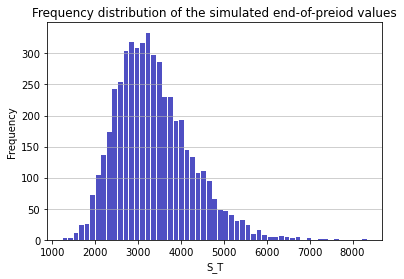

In [76]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [77]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('AMZN put', str(p))

AMZN put 282.45100011921187


# GREEKS

# DELTA

In [79]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [80]:
delta(3299.86, 3250, 1, 0.01575, 0, 0.255, 'put')

-0.4016916949091064

In [83]:
S = np.linspace(2000, 4500, 51)
T = np.linspace(0.1, 1.5, 12)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 3250, T[i], 0.01575, 0, 0.255, 'put')

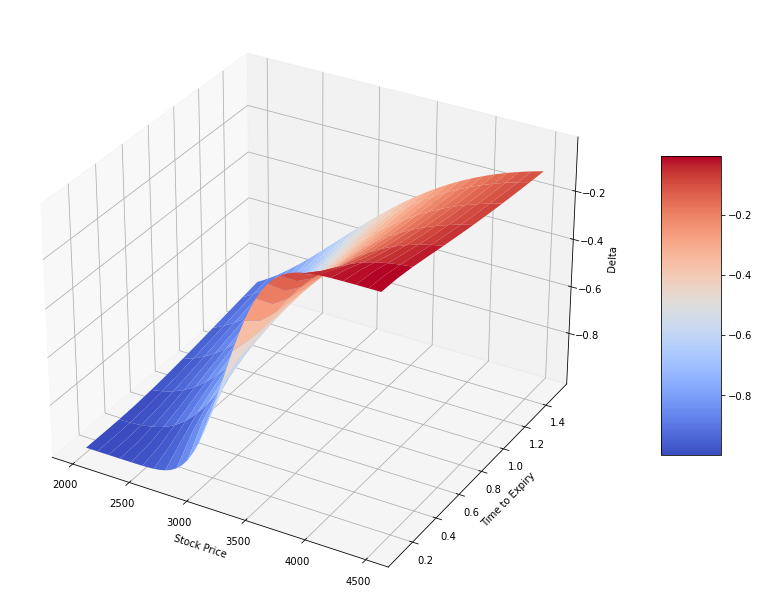

In [84]:
fig = plt.figure(figsize=(20, 11))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# GAMMA

In [85]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [86]:
gamma(3299.86, 3250, 1, 0.01575, 0, 0.255, 'put')

0.0004596361570125105

In [87]:
S = np.linspace(2000, 4500, 20)
T = np.linspace(0.1, 1.5, 20)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 3250, T[i], 0.01575, 0, 0.255, 'put')

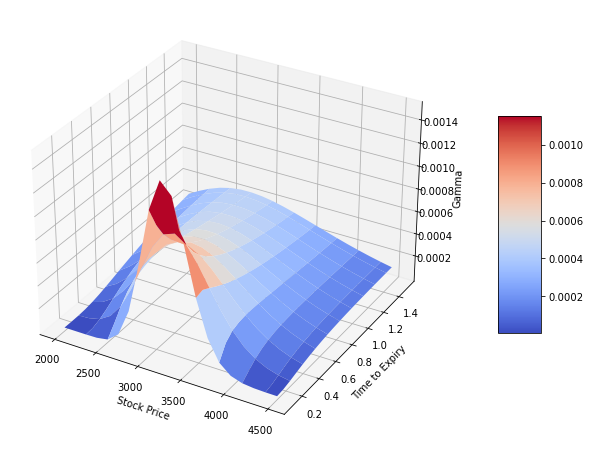

In [88]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# THETA

In [89]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        theta = -vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [90]:
theta(3299.86, 3250, 1, 0.01575, 0, 0.255, 'put')

-188.04049049860052

In [92]:
S = np.linspace(1500, 4500, 51)
T = np.linspace(0.01, 1, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 3250, T[i], 0.01575, 0, 0.255, 'put')

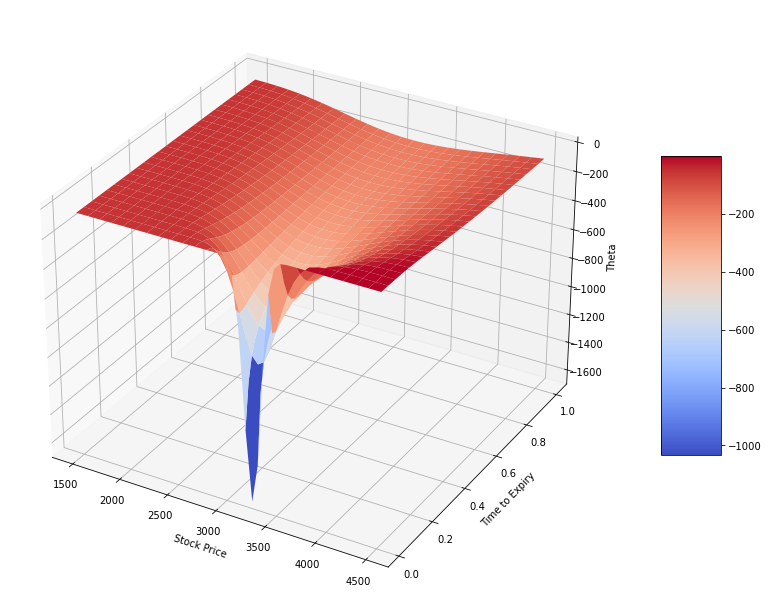

In [93]:
fig = plt.figure(figsize=(20, 11))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# RHO

In [94]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [95]:
rho(3299.86, 3250, 1, 0.01575, 0, 0.255, 'put')

-1607.3018124296034

In [96]:
S = np.linspace(1500, 4500, 51)
T = np.linspace(0.1, 1.5, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 3250, T[i], 0.01575, 0, 0.255, 'put')

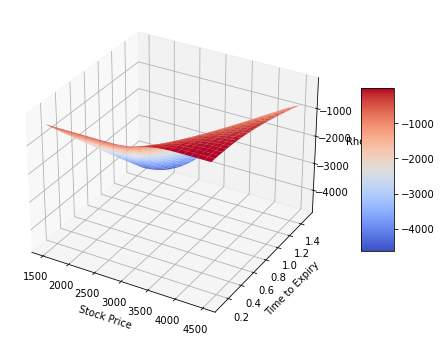

In [97]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [98]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [99]:
vega(3299.86, 3250, 1, 0.01575, 0, 0.255, 'put')

1276.2783290418374

In [102]:
S = np.linspace(1500, 5500, 51)
T = np.linspace(0.1, 1.5, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 3250, T[i], 0.01575, 0, 0.255, 'put')

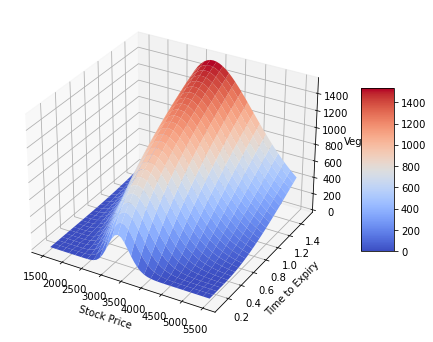

In [103]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);